# Project 4: Wrangle and Analyze Data

## Gathering data via Twitter API

In [204]:
# import the required packages
import pandas as pd
import json
import requests
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [153]:
# the code to get the Twitter data via API - which I was not able to execute
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [205]:
# open the "tweet-json.txt" file 
json_df = pd.read_table('tweet-json.txt',  
                       header=None,
                       converters={column: json.loads for column in [0]})
 
tweetlist = []
 
for i in range(len(json_df)):
    tweetlist.append(json_df[0][i])


json_df = pd.DataFrame(tweetlist)

In [206]:
# only use three of the columns for the further wrangling process
df_raw = []

tweet_id = json_df['id_str']
retweet_count = json_df['retweet_count']
favorite_count = json_df['favorite_count']


df_raw.append(tweet_id)
df_raw.append(retweet_count)
df_raw.append(favorite_count)


twitter_ext = pd.DataFrame(df_raw)
twitter_ext = twitter_ext.transpose()




In [207]:
# read CSV "twitter-archive-enhanced.csv"
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [208]:
# Programmatically download and read TSV "image_predictions.tsv"
img = "https://video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv"
response = requests.get(img)
with open ("image_predictions.tsv", "wb") as f:
    f.write(response.content)


twitter_pred = pd.read_csv("image_predictions.tsv", sep = "\t")

## Assess Data

In [209]:
# Investigate the twitter_pred dataset
twitter_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [210]:
# Investigate the twitter_pred dataset
twitter_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [211]:
# Checking for dubplicate entries
twitter_pred.jpg_url.duplicated().sum()

66

In [212]:
# Investigate the twitter_archive dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [213]:
# Investigate the twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [214]:
# Investigate the twitter_ext dataset
twitter_ext.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [215]:
# Investigate the twitter_ext dataset
twitter_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [216]:
# Investigate the twitter_archive dataset
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Bones          1
Ebby           1
Schnitzel      1
Lilli          1
Alexander      1
Name: name, Length: 957, dtype: int64

In [217]:
# Further investigation of the name = "None" quality issue 
twitter_archive[twitter_archive.name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [218]:
# Further investigation of the name = "O" quality issue
twitter_archive[twitter_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


## Quality Issues 

#### twitter_archive:
1) contains retweets (duplicate data) <br>
2) tweet_id is in integer instead of a an object <br>
3) timestamp is of type object instead of datetime <br>
4) Unnecessary columns <br>
5) dog names: some dogs are named 'None' (in string type) instead of 'NaN' <br>
6) detected the name "O'Malley" written as "O" in <br>
7) in some cases rating is in decimal form


#### twitter_pred:
7) Duplicate entries  <br>
8) p1, p2, p3 columns are not consistent concerning capitalization <br>


## Tidiness Issues

#### twitter_archive:
1) all of the last four columns belong to the same variable (dogo, floofer, pupper, puppo) <br>

#### twitter_ext:
2) refers to the same tweets as twitter_archive <br>



# Clean


In [219]:
# Copies of the data for cleaning
twitter_archive_c = twitter_archive.copy()
twitter_ext_c = twitter_ext.copy()
twitter_pred_c = twitter_pred.copy()

#### Quality Issue 2): tweet_id is in integer instead of a an object

Solution: Change type of tweet_id to object 

In [220]:
# Code 
twitter_archive_c.tweet_id = twitter_archive_c.tweet_id.astype("str")

In [221]:
# Test
twitter_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Tidiness Issue 1): all of the last four columns belong to the same variable (dogo, floofer, pupper, puppo)

Solution: Use the fact that the evolutional stage of the dog is mentioned in the "text" column. Extract the dogs stage from the column "text" to one colum "dog_stage"

In [222]:
# Code 
twitter_archive_c["dog_stage"] = twitter_archive_c["text"].str.extract("(floofer|doggo|pupper|puppo)")
twitter_archive_c.drop(columns = (["doggo", "floofer", "pupper", "puppo"]), inplace = True)

In [223]:
# Test 
twitter_archive_c.dog_stage.value_counts()
twitter_archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Quality Issue 1): twitter_archive contains retweets (duplicate data) 

Solution: drop retweets (tweets where retweeted_status_id not NaN)


In [224]:
# Code
twitter_archive_c = twitter_archive_c[twitter_archive_c.retweeted_status_id.isnull()]

In [225]:
# Test
len(twitter_archive_c[twitter_archive_c.retweeted_status_id.isnull()==False])

0

#### Quality Issue 3): retweeted_status_timestamp are of type object instead of datetime 

Solution: change timestamp to type datetime

In [226]:
# Code 
twitter_archive_c.timestamp = pd.to_datetime(twitter_archive_c.timestamp)


In [227]:
# Test
twitter_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Quality Issue 4): unecessary columns 

Solution: drop unwanted columns

In [228]:
# code
twitter_archive_c.drop(["in_reply_to_user_id", "in_reply_to_status_id", "source"], axis=1, inplace=True)

In [229]:
# test
twitter_archive_c.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Quality Issue 5): dog names - some dogs are named 'None' (in string type) instead of 'NaN' <br>
Solution: Change all "None" entries to "NaN"

In [230]:
# code
twitter_archive_c.name.replace("None", np.nan, inplace = True)

In [231]:
# test
twitter_archive_c[twitter_archive_c.name == "None"]

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Quality Issue 6): detected the name "O'Malley" written as "O" in <br>
Solution: Replace "O" with "O'Malley"

In [232]:
# code 
twitter_archive_c.name.replace("O", "O'Malley", inplace = True)

In [233]:
# test
twitter_archive_c[twitter_archive_c.name == "O"]

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Quality Issue 7): duplicate entries in twitter_pred <br>
Solution: Drop duplicates

In [234]:
# Again check twitter_pred structure
twitter_pred_c.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [235]:
# code
twitter_pred_c.drop_duplicates(subset=["jpg_url"], keep="first", inplace = True)

In [236]:
# test
twitter_pred_c.duplicated().sum()

0

#### Quality Issue 8): p1, p2, p3 columns are not consistent in capitalization <br>
Solution: Capitalize the first letter of the entries in p1,p2 and p3


In [237]:
# Code
twitter_pred_c["p1"] = twitter_pred_c["p1"].str.capitalize()
twitter_pred_c["p2"] = twitter_pred_c["p2"].str.capitalize()
twitter_pred_c["p3"] = twitter_pred_c["p2"].str.capitalize()

In [238]:
# Test
twitter_pred_c.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Collie,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Miniature_pinscher,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Malinois,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Redbone,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Rottweiler,0.154629,True


#### Quality Issue 9): in some cases rating is in decimal form
Solution: Extract decimal ratings with use of regular expressions

In [239]:
#code
twitter_archive_c.replace(twitter_archive_c[twitter_archive_c.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator'], round(twitter_archive_c[twitter_archive_c.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator']), inplace = True)

C:\Users\Johannes\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [240]:
#test
twitter_archive_c.rating_numerator


0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2175, dtype: int64

#### Tidiness Issue 2): twitter_ext refers to the same tweets as twitter_archive <br>

Solution: Merge both of the DataFrames

In [241]:
# Checking for a potentional key feature to merge
twitter_ext_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [242]:
# Checking for a potentional key feature to merge
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [243]:
# Code 
twitter_ext_c.rename(columns={"id_str" : "tweet_id"}, inplace = True)
twitter_master_c = pd.merge(twitter_archive_c, twitter_ext_c, on = 'tweet_id', how = "left")

In [244]:
# Test
twitter_master_c.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


In [245]:
#write twitter_master_c to CSV
twitter_master_c.to_csv("twitter_master.csv")

# Data Analysis

#### 1) Relation between retweet_count und favorite_count 


Text(0.5, 1.0, 'Relation between retweet count and favorite count')

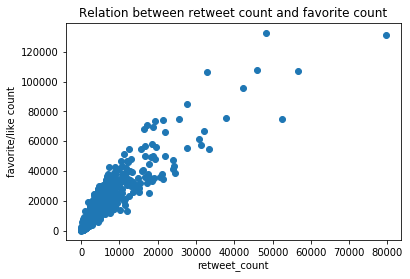

In [246]:
# plot the relationship between retweet_count and favorite_count
plt.plot(twitter_master_c.retweet_count, twitter_master_c.favorite_count, "o")
plt.xlabel("retweet_count")
plt.ylabel("favorite/like count")
plt.title("Relation between retweet count and favorite count")

In [247]:
# calculate the Pearson-Correlation-Coefficient of retweet_count and favorite_count
pearsonr(twitter_master_c.retweet_count, twitter_master_c.favorite_count)[0]

0.9117316533564095

Insight: Strong Correlation between retweet count and favorite count

#### 2) Most often Rating

In [248]:
# value counts of the ratings
twitter_master_c.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Insigth: The most often rating given is 12, followed by 10, 11 and 13.

#### 3) Most often evolutional stage of dog




Text(0, 0.5, 'count')

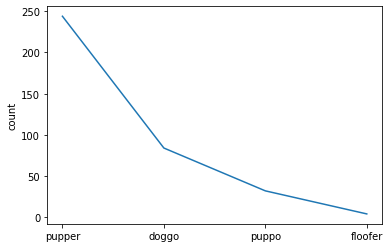

In [249]:
# plot the value counts of the four evolutional stages 
plt.plot(twitter_master_c.dog_stage.value_counts())
plt.ylabel("count")

Insight: Most of the rated dogs are pupper, followed by doggo, puppo and lastly floofer

# Sources:
- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- https://stackoverflow.com/questions/30558087/is-from-matplotlib-import-pyplot-as-plt-import-matplotlib-pyplot-as-plt
- https://www.includehelp.com/python/dot-plot.aspx#:~:text=The%20dot%20plot%20is%20a%20type%20of%20data,connected.%20Matplotlib.pyplot%20provides%20a%20feature%20of%20dot%20plots.
- https://stackoverflow.com/questions/33191744/how-to-add-new-line-in-markdown-presentation
- https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
- https://www.geeksforgeeks.org/python-pandas-series-str-extract/